In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
sns.set_palette('Set2')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data=pd.read_csv("telecom_churn.csv")

In [ ]:
data.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [ ]:
data.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [ ]:
data.isnull().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(243553, 14)

In [ ]:
data.churn.value_counts()

0    194726
1     48827
Name: churn, dtype: int64

In [ ]:
data=data.drop("customer_id",axis=1)

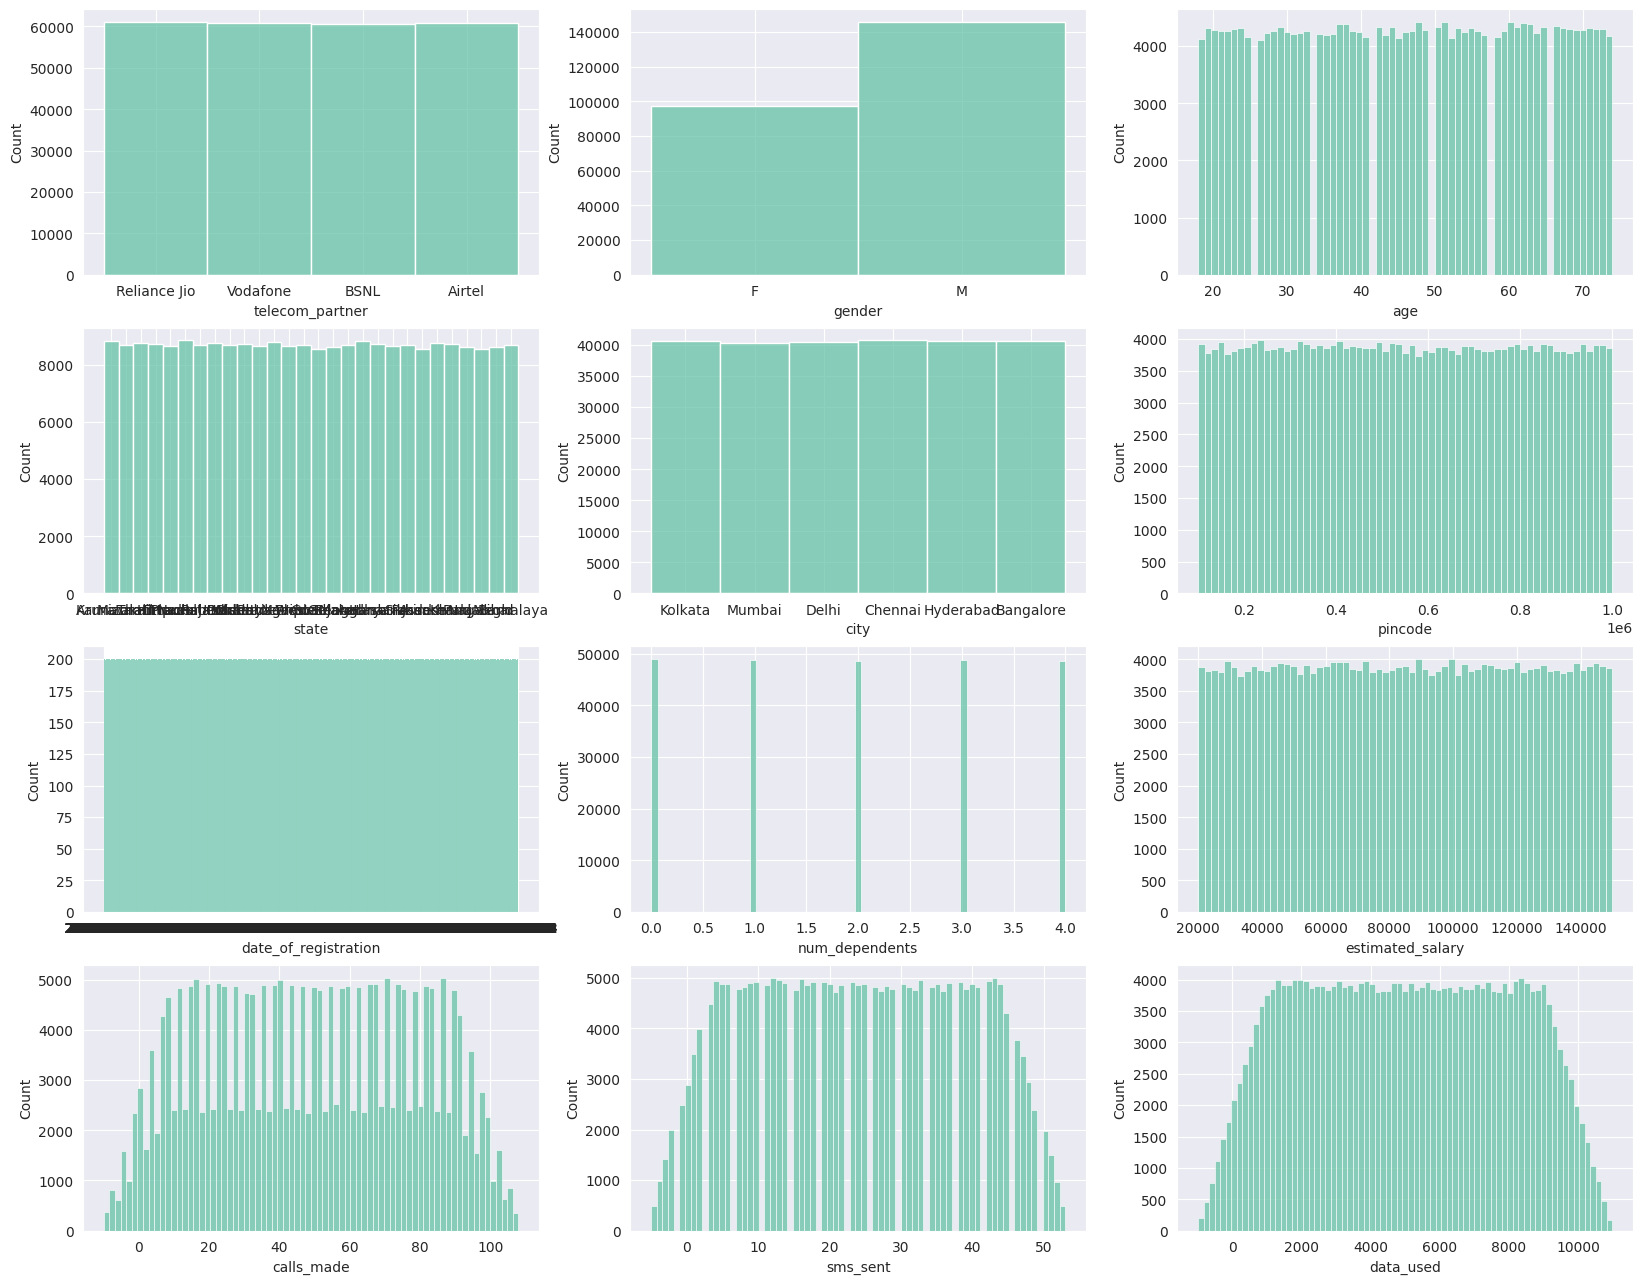

In [ ]:
plt.figure(figsize=(20,20))
i=1
for col in data.columns[:-1]:
    plt.subplot(5,3,i)
    sns.histplot(data[col])
    i=i+1

In [ ]:
churn_data=data[data['churn']==1]['telecom_partner']
non_churn_data=data[data['churn']==0]['telecom_partner']

In [ ]:
churn_data

2             Vodafone
3                 BSNL
7                 BSNL
10              Airtel
16            Vodafone
              ...     
243523    Reliance Jio
243527            BSNL
243529    Reliance Jio
243533    Reliance Jio
243535            BSNL
Name: telecom_partner, Length: 48827, dtype: object

In [ ]:
company_names=list(churn_data.value_counts().keys())
company_names

['Airtel', 'Reliance Jio', 'Vodafone', 'BSNL']

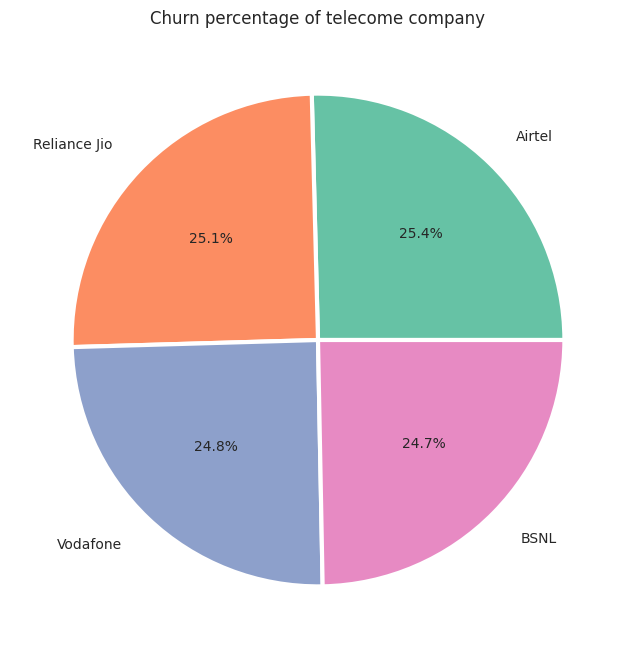

In [ ]:
plt.figure(figsize=(10,8))
company_churn_values=list(churn_data.value_counts())
plt.pie(company_churn_values,labels=company_names,
       autopct='%.1f%%',labeldistance=1.15,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title("Churn percentage of telecome company")
plt.show()

In [ ]:
churn_data_gender=data[data['churn']==1]['gender']
non_churn_data_gender=data[data['churn']==0]['gender']


In [ ]:
gender_value=list(churn_data_gender.value_counts())
genders=['Male',"female"]

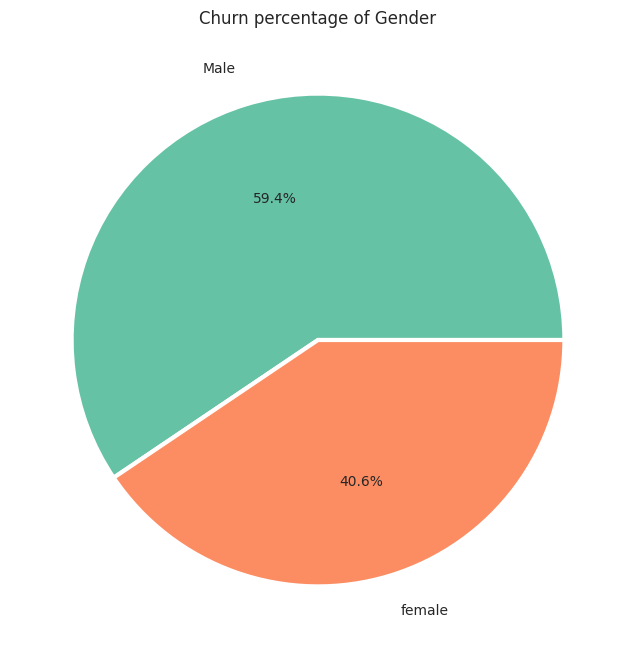

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(

gender_value,
autopct='%.1f%%',
labels=genders,
labeldistance=1.15,
wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }

)
plt.title("Churn percentage of Gender")
plt.show()

In [ ]:
nage=data[data['churn']==1]['age']
age=data[data['churn']==0]['age']

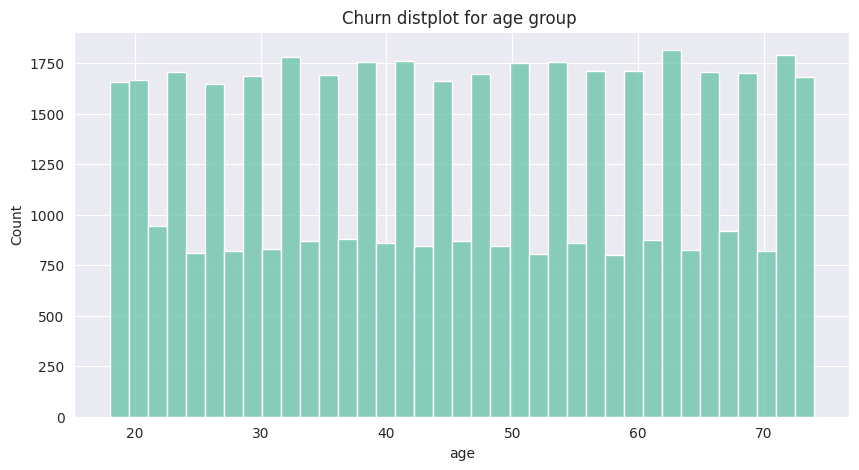

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(nage)
plt.title("Churn distplot for age group ")
plt.show()

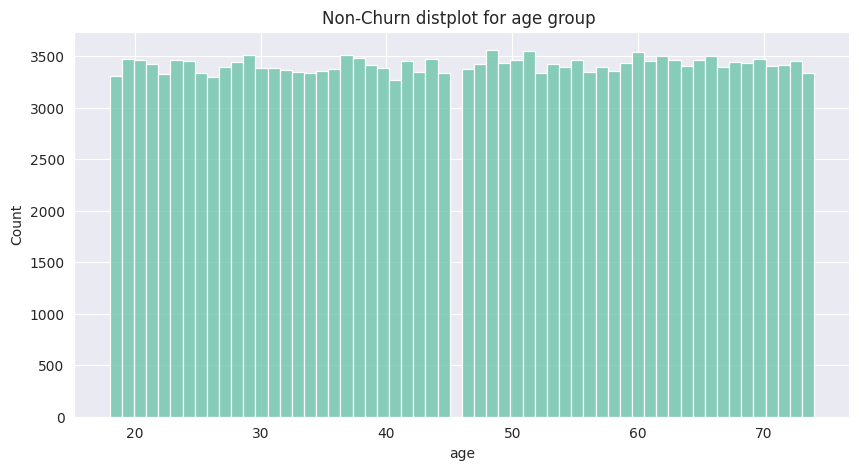

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(age)
plt.title("Non-Churn distplot for age group ")
plt.show()

In [ ]:
churn_salary=data[data['churn']==1]['estimated_salary']
nonchurn_salary=data[data['churn']==0]['estimated_salary']

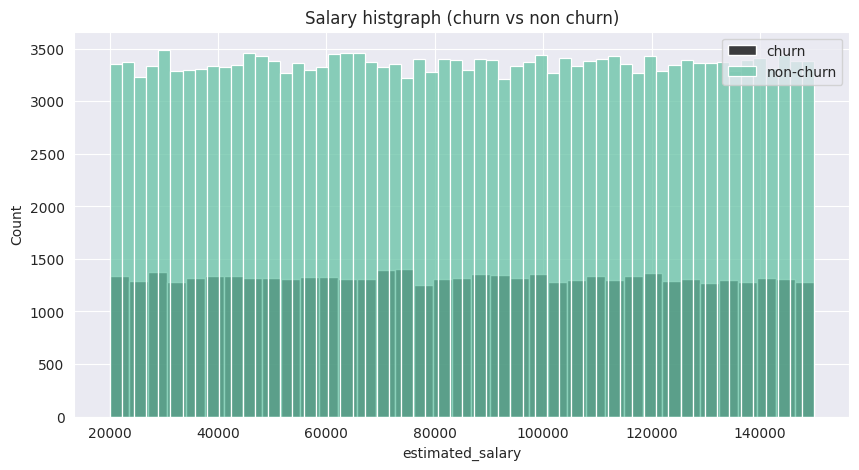

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(churn_salary,label="churn",color="black")
sns.histplot(nonchurn_salary,label="non-churn")
plt.title("Salary histgraph (churn vs non churn)")
plt.legend()
plt.show()

In [ ]:
churn_data_state=data[data['churn']==1]['state']
non_churn_data_state=data[data['churn']==0]['state']

In [ ]:
churn_value_state=list(churn_data_state.value_counts())
churn_value_state_keys=list(churn_data_state.value_counts().keys())

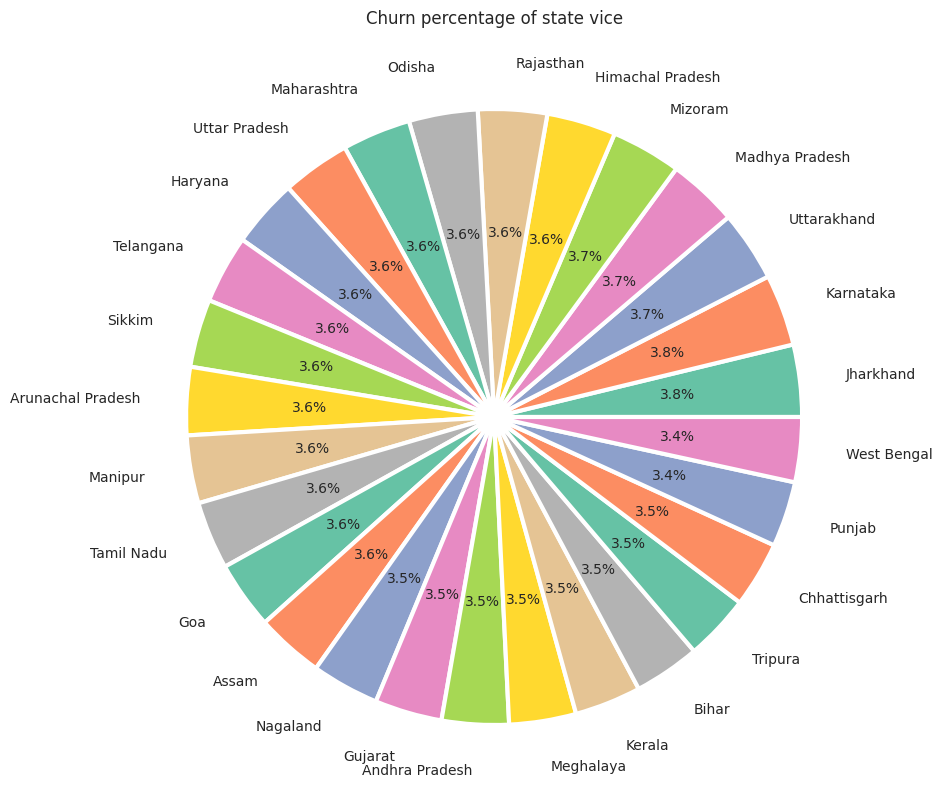

In [ ]:
plt.figure(figsize=(20,10))
plt.pie(

churn_value_state,
autopct='%.1f%%',
labels=churn_value_state_keys,
labeldistance=1.15,
wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }

)
plt.title("Churn percentage of state vice")
plt.show()

In [ ]:
churn_data_calls_made=data[data['churn']==1]['calls_made']
non_churn_calls_made=data[data['churn']==0]['calls_made']

churn_value_calls_made=list(churn_data_calls_made.value_counts().sort_values())
non_churn_value_calls_made=list(non_churn_calls_made.value_counts().sort_values())

Text(0.5, 1.0, 'Histplot calls made churn customer')

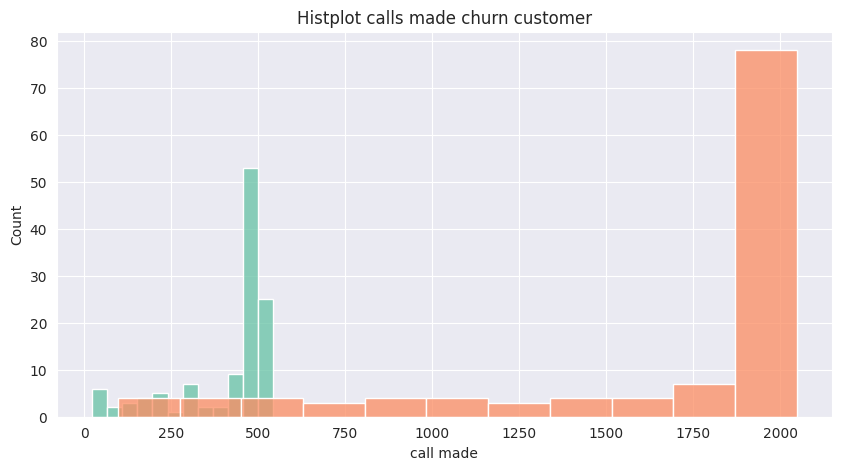

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(churn_value_calls_made)
sns.histplot(non_churn_value_calls_made)
plt.xlabel("call made")
plt.title("Histplot calls made churn customer")

In [ ]:
churn_data_data_used=data[data['churn']==1]['data_used']
non_churn_data_used=data[data['churn']==0]['data_used']

Text(0.5, 1.0, 'scatterplot data usage made churn  and non-churn customer')

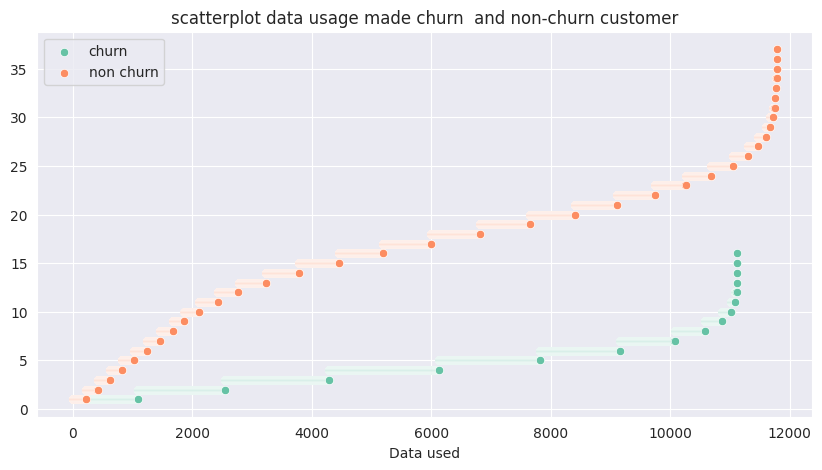

In [ ]:
churn_value_calls_made=list(churn_data_data_used.value_counts().sort_values())
non_churn_value_calls_made=list(non_churn_data_used.value_counts().sort_values())
plt.figure(figsize=(10,5))
sns.scatterplot(churn_value_calls_made,label="churn")
sns.scatterplot(non_churn_value_calls_made,label="non churn")
plt.xlabel("Data used")
plt.title("scatterplot data usage made churn  and non-churn customer")

In [ ]:
data

,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243548,Airtel,F,28,Mizoram,Kolkata,110295,2023-05-03,3,130580,28,9,4102,0
243549,Reliance Jio,F,52,Assam,Kolkata,713481,2023-05-03,0,82393,80,45,7521,0
243550,Reliance Jio,M,59,Tripura,Kolkata,520218,2023-05-03,4,51298,26,4,6547,0
243551,BSNL,M,49,Madhya Pradesh,Kolkata,387744,2023-05-03,2,83981,80,15,1125,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
for i in data.columns:
    if data[i].dtype=="object":
        data[i]=model.fit_transform(data[i])

In [ ]:
data.head()

,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,2,0,25,10,4,755597,0,4,124962,44,45,-361,0
1,2,0,55,16,5,125926,0,2,130556,62,39,5973,0
2,3,0,57,1,2,423976,0,0,148828,49,24,193,1
3,1,1,46,22,4,522841,0,1,38722,80,25,9377,1
4,1,0,26,24,2,740247,0,2,55098,78,15,1393,0


In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop("churn",axis=1)
y=data['churn']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()
x_train1, y_train1 = smote.fit_resample(x_train, y_train)

In [ ]:
from sklearn.preprocessing import StandardScaler

model=StandardScaler()

x_train1=pd.DataFrame(model.fit_transform(x_train1),columns=x_train.columns)
x_test=pd.DataFrame(model.fit_transform(x_test),columns=x_test.columns)

In [ ]:
x_train1.shape

(272586, 12)

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier7 = LogisticRegression()
classifier7.fit(x_train1,y_train1)

LogisticRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(x_train,y_train)

print("accuracy without smoting",classifier.score(x_test,y_test))

accuracy without smoting 0.49911039334300494


In [ ]:
y_pred7 = classifier7.predict(x_test)


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm7 = confusion_matrix(y_test, y_pred7)
print(cm7)

[[30037 28396]
 [ 7446  7187]]


In [ ]:
print("accuracy without smoting",classifier7.score(x_test,y_test))

accuracy without smoting 0.5094572030766704


Text(0.5, 1.0, 'confusion matrix for Logistic regression')

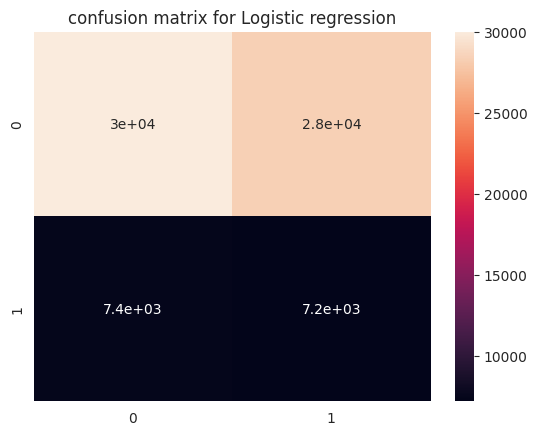

In [ ]:
cn=confusion_matrix(y_test,y_pred7)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for Logistic regression")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix



# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train1,y_train1)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
 print("smoting data score in svm",clf.score(x_test,y_test))

smoting data score in svm 0.5521172638436482


In [ ]:
# Create Decision Tree classifer object
clfd = DecisionTreeClassifier()

# Train Decision Tree Classifer
clfd = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clfd.predict(x_test)

In [ ]:
print("score on non smoting data",clfd.score(x_test,y_test))

score on non smoting data 0.20027098787397696


Text(0.5, 1.0, 'confusion matrix for Decision tree classifier')

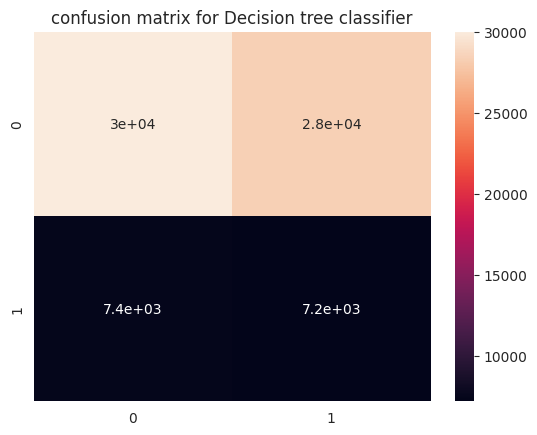

In [ ]:
cn=confusion_matrix(y_test,y_pred7)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for Decision tree classifier")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(x_train1, y_train1)


classifier_rf.score(x_test,y_test)

0.5759587222511154

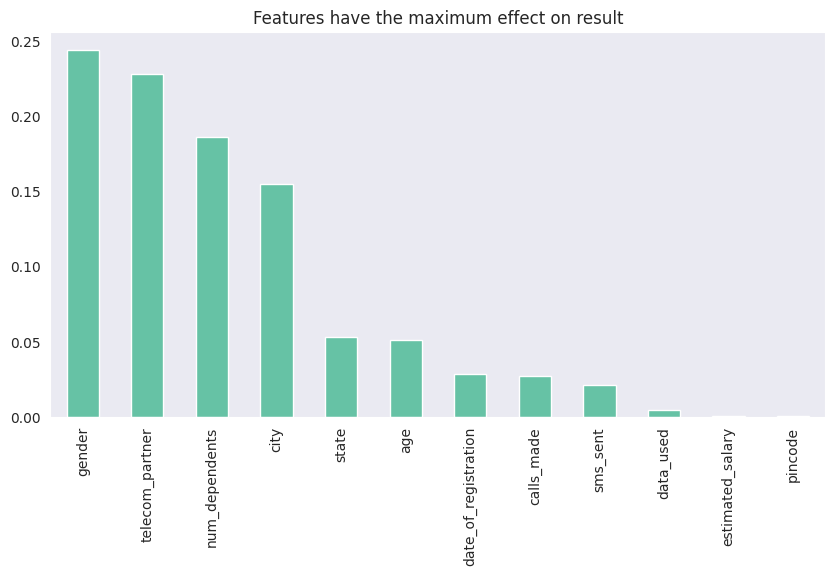

In [ ]:
#Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(classifier_rf.feature_importances_, index=x_train1.columns).sort_values(ascending=False)
plt.figure(figsize=(10,5))
# Plot a simple bar chart
feature_importances.plot.bar();
plt.grid()
plt.title("Features have the maximum effect on result")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
lf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                max_depth=1, random_state=0).fit(x_train1, y_train1)
lf.score(x_test, y_test)

0.5391290066515205

In [ ]:
y_pred = lf.predict(x_test)

Text(0.5, 1.0, 'confusion matrix for gradient boosting  classifier')

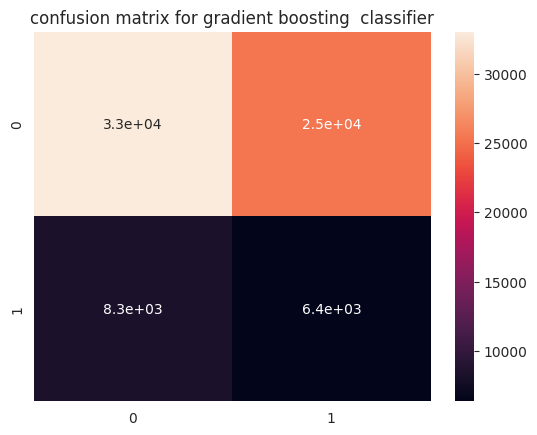

In [ ]:
cn=confusion_matrix(y_test,y_pred)
sns.heatmap(cn,annot=True)
plt.title("confusion matrix for gradient boosting  classifier")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
lf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                max_depth=1, random_state=0).fit(x_train, y_train)
print("score on non smoting data",lf.score(x_test, y_test))


score on non smoting data 0.20027098787397696
